In [1]:
%load_ext watermark
%watermark

Last updated: 2021-04-25T21:06:43.245432+01:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 32 Stepping 1, AuthenticAMD
CPU cores   : 2
Architecture: 64bit



## Data Processing

The aim of this notebook is to prepare the dataset to be used to train ML models. To do so, some outliers will be removed, scaling will be applied to numerical values and categorical values will be suitably encoded.

In the same way, he dataset will be split between training and validation data and testing data, 80% and 20% respectively.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

df = pd.read_csv('./train.csv')
df = df.drop(columns=['ID'])
df.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# Note: Product importance and customer rating are Ordinal variables which means they have an order of priority
categorical_columns = ['Gender', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Customer_rating']
numerical_columns = ['Customer_care_calls', 'Cost_of_the_Product','Discount_offered', 'Prior_purchases','Weight_in_gms', 'Price_paid']

## Categorical Encoding

In [4]:
# Encode gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Encode Importance
importance_cat = {
    "low": 1,
    "medium": 2,
    "high": 3
}
df['Product_importance'] = df['Product_importance'].apply(lambda x: importance_cat[x])

# Encode Customer rating
oe = LabelEncoder()
df['Customer_rating'] = oe.fit_transform(df['Customer_rating'])

# Encode Nominal categories
nominal = ['Warehouse_block', 'Mode_of_Shipment']
df = pd.get_dummies(df, columns=nominal)

df.head(15)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,4,1,177,3,1,0,44,1233,1,0,0,0,1,0,1,0,0
1,4,4,216,2,1,1,59,3088,1,0,0,0,0,1,1,0,0
2,2,1,183,4,1,1,48,3374,1,1,0,0,0,0,1,0,0
3,3,2,176,4,2,1,10,1177,1,0,1,0,0,0,1,0,0
4,2,1,184,3,2,0,46,2484,1,0,0,1,0,0,1,0,0
5,3,0,162,3,2,0,12,1417,1,0,0,0,0,1,1,0,0
6,3,3,250,3,1,0,3,2371,1,0,0,0,1,0,1,0,0
7,4,0,233,2,1,0,48,2804,1,0,0,0,0,1,1,0,0
8,3,3,150,3,1,0,11,1861,1,1,0,0,0,0,1,0,0
9,3,1,164,3,2,0,29,1187,1,0,1,0,0,0,1,0,0


## New Column Price Paid

Cost of the product - Discount offered

In [5]:
df['Price_paid'] = df['Cost_of_the_Product'] - (df['Discount_offered'] * df['Cost_of_the_Product'] * 0.01)
df.head(5)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Price_paid
0,4,1,177,3,1,0,44,1233,1,0,0,0,1,0,1,0,0,99.12
1,4,4,216,2,1,1,59,3088,1,0,0,0,0,1,1,0,0,88.56
2,2,1,183,4,1,1,48,3374,1,1,0,0,0,0,1,0,0,95.16
3,3,2,176,4,2,1,10,1177,1,0,1,0,0,0,1,0,0,158.40
4,2,1,184,3,2,0,46,2484,1,0,0,1,0,0,1,0,0,99.36


Text(0.5, 1.0, 'Actual Price Paid by Client')

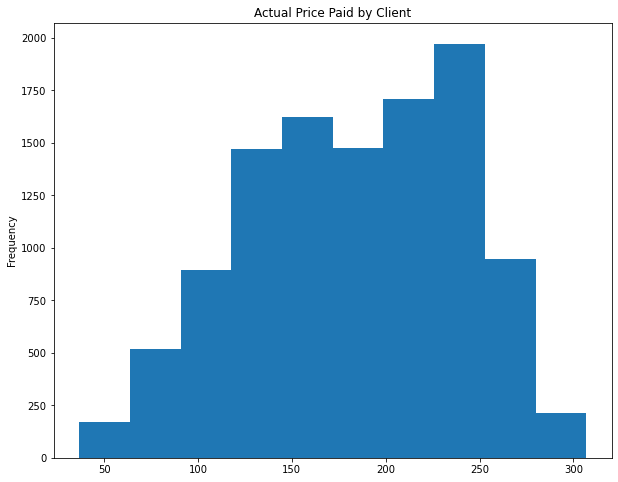

In [6]:
df['Price_paid'].plot.hist(figsize=(10,8))
plt.title('Actual Price Paid by Client')

## Test data Split

In [191]:
independent_variables = df.drop(['Reached.on.Time_Y.N'], axis=1)
dependent_variables = df['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variables, test_size=.2)

test = X_test.join(y_test)
train = X_train.join(y_train)
train_no_outliers = train.copy()

train.shape

(8799, 18)

## Spot Outliers

Although they meet the criteria to be outliers they correspond to significant amount of entries. Therefore, models will be trained with a dataset with outliers and another one without them.

In [192]:
from scipy import stats

def searchOutliers(columns):
    for column in columns:
        print('{} | Outliers: {} | Type: {}'.format(train_no_outliers[column].name,         
            len(train_no_outliers[np.abs(stats.zscore(train_no_outliers[column])) > 3]),
            train_no_outliers[column].dtype))

searchOutliers(numerical_columns)

Customer_care_calls | Outliers: 0 | Type: int64
Cost_of_the_Product | Outliers: 0 | Type: int64
Discount_offered | Outliers: 105 | Type: int64
Prior_purchases | Outliers: 151 | Type: int64
Weight_in_gms | Outliers: 0 | Type: int64
Price_paid | Outliers: 0 | Type: float64


In [202]:
# Remove outliers
for column in numerical_columns:
    train_no_outliers = train_no_outliers[np.abs(stats.zscore(train_no_outliers[column])) <= 3]
    
searchOutliers(numerical_columns)
train_no_outliers.shape

Customer_care_calls | Outliers: 0 | Type: int64
Cost_of_the_Product | Outliers: 0 | Type: int64
Discount_offered | Outliers: 0 | Type: int64
Prior_purchases | Outliers: 0 | Type: int64
Weight_in_gms | Outliers: 0 | Type: int64
Price_paid | Outliers: 0 | Type: float64


(6672, 18)

## Scaling

In [203]:
# Scale train set with outliers
scaler = RobustScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
train.head(5)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Price_paid,Reached.on.Time_Y.N
9169,1.0,0,0.777778,2.0,1,0,-0.833333,-0.918860,0,0,0,0,1,0,1,0,0.940126,1
2055,0.5,2,0.172840,0.0,2,0,5.166667,-0.158542,0,1,0,0,0,1,0,0,-0.494432,1
8761,-0.5,3,-0.962963,0.0,2,1,-0.166667,0.152936,0,0,0,0,1,0,1,0,-0.643511,0
8059,0.5,1,-0.283951,1.0,1,0,-0.666667,0.447905,0,0,0,0,1,0,1,0,-0.010255,0
5995,1.0,0,0.444444,1.0,1,1,-0.500000,-0.972434,0,0,0,0,1,0,0,1,0.593230,0


In [204]:
# Scale train set with no outliers
scaler_no = RobustScaler()
train_no_outliers[numerical_columns] = scaler_no.fit_transform(train_no_outliers[numerical_columns])

train_no_outliers.head(10)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Price_paid,Reached.on.Time_Y.N
9169,1.0,0,0.708861,2.0,1,0,-0.8,-1.006400,0,0,0,0,1,0,1,0,0.852955,1
8761,-0.5,3,-1.075949,0.0,2,1,0.0,0.029968,0,0,0,0,1,0,1,0,-1.069540,0
8059,0.5,1,-0.379747,1.0,1,0,-0.6,0.315187,0,0,0,0,1,0,1,0,-0.300783,0
5995,1.0,0,0.367089,1.0,1,1,-0.4,-1.058203,0,0,0,0,1,0,0,1,0.431832,0
10121,-0.5,2,0.670886,1.0,2,0,0.2,0.089301,0,0,0,0,1,0,1,0,0.630212,0
8065,-1.0,2,-1.113924,1.0,1,0,-0.2,0.438973,0,0,0,0,1,0,1,0,-1.089485,1
4682,0.0,3,-0.734177,0.0,1,1,-0.6,-0.104360,1,0,0,0,0,0,0,1,-0.664346,1
4788,-0.5,3,-0.329114,4.0,2,0,0.6,0.390784,0,0,0,1,0,0,1,0,-0.405461,0
9757,-1.0,4,0.354430,0.0,1,0,-0.6,-0.109179,0,0,0,0,1,0,0,1,0.452312,0
6546,1.0,2,0.835443,1.0,2,0,0.4,-0.807620,0,0,0,1,0,0,0,1,0.753631,1


In [205]:
train.to_pickle('./train_set_outliers.pkl')
train_no_outliers.to_pickle('./train_set.pkl')
test.to_pickle('./test_set.pkl')

In [206]:
train.shape

(8799, 18)